# **The Best Neighborhood to Be a Panther**


## **Introduction**

Our project aims to find the best Pittsburgh neighborhood for a panther to live! 3 factors we came up with that would be very important for a panther's livelihood were habitat, food, and people. The first metric is the habitat metric, which finds the neighborhood with the most amount of parks/greenspaces because panthers need large amounts of space to live and explore. The second metric is deer population which measures the amount of deer crossing signs in a neighborhood in order to gauge the deer population in that area for the panther to eat. The third and final metric is population density in order to find the neighborhood with the least amount of people because people can interupt and destroy the way panthers live. 

## **The Metrics**

### **Ally's metric (habitat/forests)**
###### (Ally)

neighborhood
South Side Slopes      6
Beechview              6
Mount Washington       5
Hazelwood              5
Troy Hill              5
Marshall-Shadeland     4
Elliott                4
East Liberty           4
Sheraden               4
Lower Lawrenceville    3
Name: type, dtype: int64


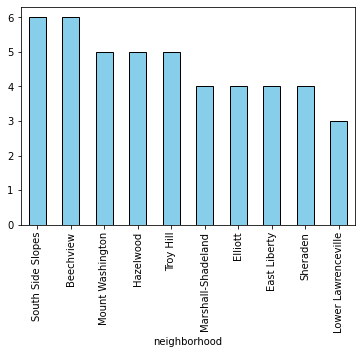

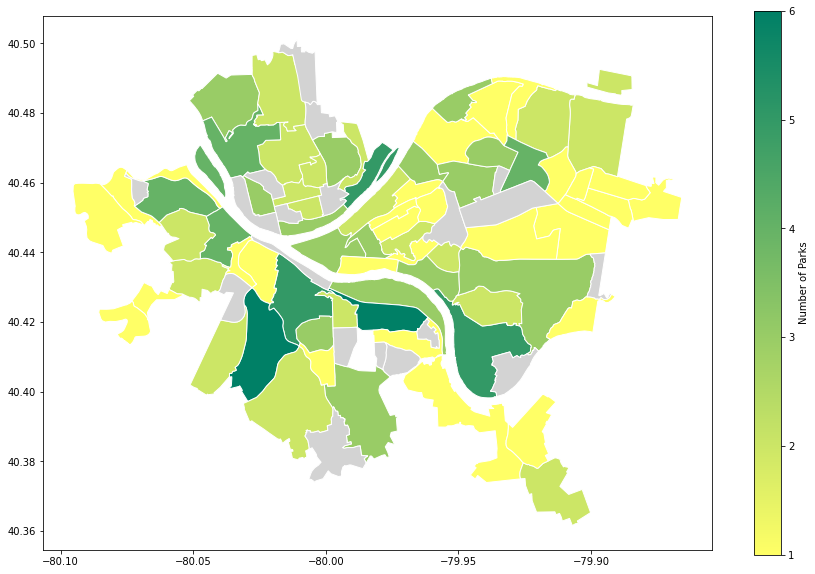

In [7]:
import pandas as pd
import geopandas
%matplotlib inline

#reads the dataset
data = pd.read_csv("Pittsburgh Parks.csv")

#Gets just the entries with the type "Park"
query_mask = data["type"]=="Park" 
gridcode = data[query_mask]
gridcode.head(10)


#Sums the amount of entries each neighborhood has in the dataset, and this will show how many parks are in each neighborhood
gridcode = gridcode.groupby("neighborhood").count()["type"].sort_values(ascending=False)


#plots a bar graph of the Top 10 neighborhoods with the most parks in Pittsburgh
top10 = gridcode.head(10)
print(top10)
top10.plot(kind="bar", color="skyblue", edgecolor="black")



#Makes a Choropleth map of Pittsburgh showing the how many parks each neighborhood has
parkmap = geopandas.read_file("Neighborhoods_.shp")

parkmap = parkmap.drop(columns =['objectid', 'fid_blockg', 'statefp10', 'countyfp10', 'tractce10',
       'blkgrpce10', 'geoid10', 'namelsad10', 'mtfcc10', 'funcstat10',
       'aland10', 'awater10', 'intptlat10', 'intptlon10', 'shape_leng',
       'fid_neighb', 'area', 'perimeter', 'neighbor_', 'neighbor_i',
       'hood_no', 'acres', 'sqmiles', 'dpwdiv', 'unique_id', 'sectors',
       'shape_le_1', 'shape_ar_1', 'page_numbe', 'plannerass', 'created_us',
       'created_da', 'last_edite', 'last_edi_1', 'Shape__Are', 'Shape__Len'])
parks = parkmap.merge(gridcode, how="left", left_on="hood", right_on="neighborhood")



parks.plot(column="type", cmap="summer_r", edgecolor="white", legend=True, legend_kwds={'label': 'Number of Parks'}, figsize = (15,10), 
           missing_kwds={"color":"lightgrey"})

Conclusion: The neighborhood with the most parks are South Side Slopes and Beechview, both with 6 parks each!


### **Deer Population** 
###### (Anika)
words here

&nbsp;

First, let's sort through all of the traffic signs (we only need to worry about deer signs).


In [5]:
import pandas as pd
import geopandas
%matplotlib inline

#Sort through traffic sign data to eliminate any row that is not a deer sign
signs = pd.read_csv("trafficSigns.csv")
deer_mask = signs["description"] == "Deer"
deer_signs = signs[deer_mask]

#Count and sort by how many deer signs each neighborhood has and print out Top Ten
deer_signs = deer_signs.groupby("neighborhood").count()["description"].sort_values(ascending=False)
print("\nTop Ten Neighborhoods:\n\n", deer_signs.head(10))


Top Ten Neighborhoods:

 neighborhood
Squirrel Hill South    11
Perry North             7
Stanton Heights         6
Duquesne Heights        3
South Side Slopes       3
Allentown               2
Crafton Heights         2
Perry South             2
Arlington               1
Arlington Heights       1
Name: description, dtype: int64


&nbsp;

Perfect! But, it would be nice to see the values and *visualize* the data...

&nbsp;


Text(0, 0.5, 'Number of Deer Crossing Signs')

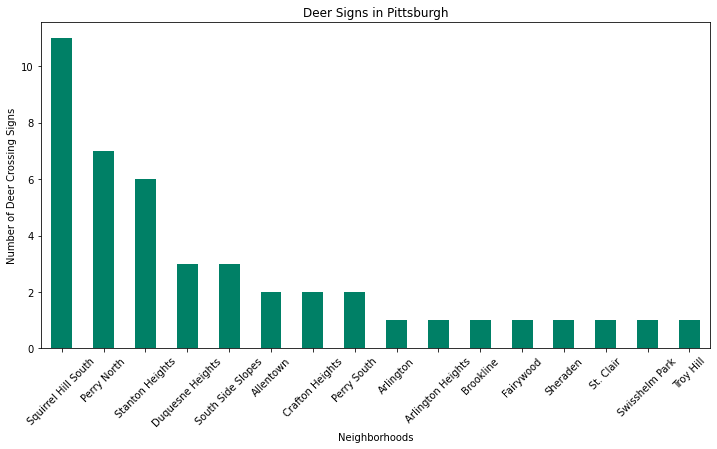

In [3]:
#Plot the results on a bar graph
chart = deer_signs.plot.bar(x="Neighborhood", y="Number of Deer Signs", colormap="summer", rot=45, figsize=(12,6))
chart.set_title("Deer Signs in Pittsburgh")
chart.set_xlabel("Neighborhoods")
chart.set_ylabel("Number of Deer Crossing Signs")

&nbsp;

Much better. But, how do we know if any of these neighborhoods overlap with the habitats we just found? If you're like me and you aren't from Pittsburgh, not many of these names mean anything to you. What if we had a map that could show us where the most deer signs are?

&nbsp;


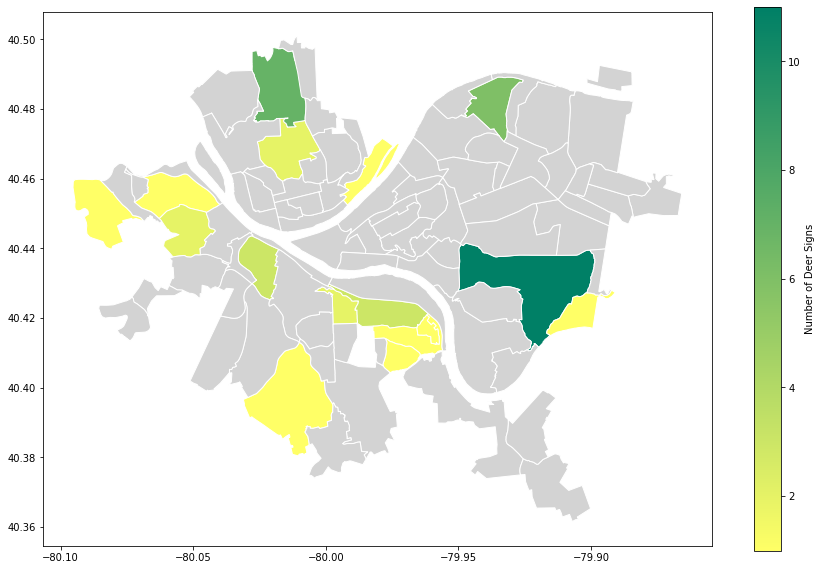

In [4]:
#Make general map, merge data
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods = neighborhoods.drop(columns=['objectid', 'fid_blockg', 'statefp10', 'countyfp10','tractce10',
       'blkgrpce10', 'geoid10', 'namelsad10', 'mtfcc10', 'funcstat10',
       'aland10', 'awater10', 'intptlat10', 'intptlon10', 'shape_leng',
       'fid_neighb', 'area', 'perimeter', 'neighbor_', 'neighbor_i',
       'hood_no', 'acres', 'sqmiles', 'dpwdiv', 'unique_id', 'sectors',
       'shape_le_1', 'shape_ar_1', 'page_numbe', 'plannerass', 'created_us',
       'created_da', 'last_edite', 'last_edi_1', 'Shape__Are', 'Shape__Len'])
deer_map = neighborhoods.merge(deer_signs, how='left', left_on='hood', right_on='neighborhood')

#Plot the chloropleth map
deer_map.plot(column='description', cmap='summer_r', edgecolor="white", legend=True, 
              legend_kwds={'label': "Number of Deer Signs"}, figsize=(15,10),
              missing_kwds={"color": "lightgrey"})

#### Conclusion:
Overall, the best neighborhood to hunt deer in is by far and large Squirrell Hill South! It has about 57% more deer than any of its competition. However, Perry North and Stanton Heights still have a considerable amount. Duquesne Heights and South Side Slopes have a few, and most of the other neighborhoods barely have any at all. 

&nbsp;


### **Tess's metric (population density)**
###### (Tess)

## **Results**

## **Conclusion**
### (our favorite neighborhoods in comparison)

**Ally:**  My metric measured how many parks were in each Pittsburgh neighborhood, because panthers need places to run around and explore! The neighborhoods with the most amount of parks was South Side Slopes and Beechview. Based on just the amount of parks alone this would be the most ideal place for a panther to live. My personal favorite neighborhood is Squirrel Hill, it has great food and really nice movie theater! Squirrel Hill does not have a lot of parks or green spaces so it would not be an ideal neighborhood for a panther at all. 

**Anika:**

**Tess:**